# 1. Simple Linear Regression on Iris dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Iris dataset

In [2]:
iris=pd.read_excel("Iris.xls")

iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Investigation and Visualization

In [3]:
iris.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


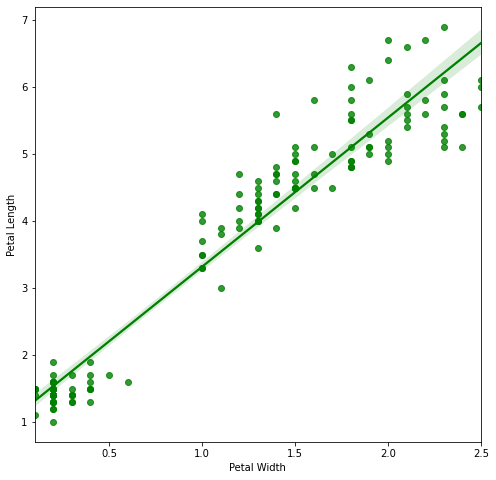

In [4]:
# Make scatter plot to investigate the relationship between response and independent variables 

plt.figure(figsize=(8,8))
sns.regplot(data=iris, x="petalwidth",y="petallength",color="g")
plt.xlabel("Petal Width")
plt.ylabel("Petal Length")
plt.show()

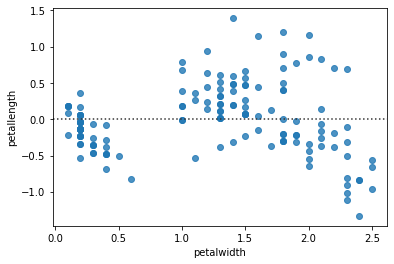

In [5]:
# Make residual plot 

sns.residplot(data=iris,x="petalwidth",y="petallength")
plt.show()

In [6]:
# Correlation matrix
iris.corr()

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


**Yêu cầu: Thực hiện linenear regression để từ pentalwidth => dự đoán pentallength**

### Splitting dataset into training and testing 

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# We need to arrange dataset into input features and target variable 
X=iris[["petalwidth"]]
y=iris[["petallength"]]

In [7]:
# Split data into train and test

X_train,X_test, y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=123)

### Train LinearRegression model

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
simpleModel=LinearRegression()

simpleModel.fit(X_train, y_train)

LinearRegression()

In [10]:
# Check intercept and slope of the model
intercept=simpleModel.intercept_
slope=simpleModel.coef_[0]

print("Intercept {} and Slope {}".format(intercept, slope))

Intercept [1.0975886] and Slope [2.20829781]


### Make prediction on test set

In [11]:
y_pred=simpleModel.predict(X_test)

In [13]:
# Create a new data point for petalwidth and use it to make prediction

X_now=[[0.98]]

y_now=simpleModel.predict(X_now)
y_now

array([[3.26172046]])

### Model Accuracy

In [14]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error

In [15]:
# Check R^2 for test dataset
simpleModel.score(X_test, y_test)

0.9447919926740306

In [16]:
# Check R^2 for train dataset
simpleModel.score(X_train, y_train)

0.91884375721525

In [17]:
# Check R^2 for entire dataset (called variance score)
simpleModel.score(X, y)

0.9267793888797143

In [18]:
# Check MSE 
MSE=mean_squared_error(y_test, y_pred)
# Check MAE
MAE=mean_absolute_error(y_test,y_pred)
print("MSE is {:.3} and MAE is {:.3}".format(MSE,MAE))

MSE is 0.196 and MAE is 0.359


### Output visualization

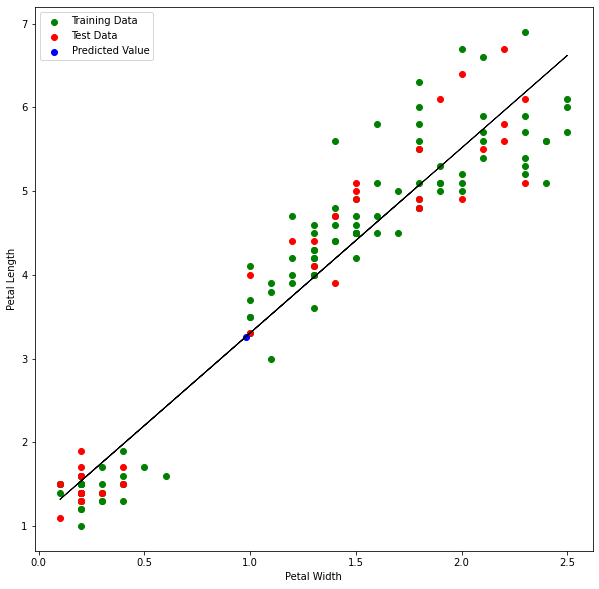

In [19]:
regressionLine=simpleModel.predict(X)

plt.figure(figsize=(10,10))
plt.scatter(X_train, y_train, color="g", label="Training Data")
plt.scatter(X_test,y_test, color="r", label="Test Data")
plt.scatter(X_now,y_now, color="b", label="Predicted Value")
plt.plot(X,regressionLine, color="k", linewidth=1)
plt.xlabel("Petal Width")
plt.ylabel("Petal Length")
plt.legend()
plt.show()

# 2. Multiple Linear Regression

**Yêu cầu: Thực hiện linear regression để từ sepallength, sepalwidth, petallength => dự đoán petalwidth**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset Iris

In [21]:
iris=pd.read_excel("Iris.xls")

iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Investigating the correlation

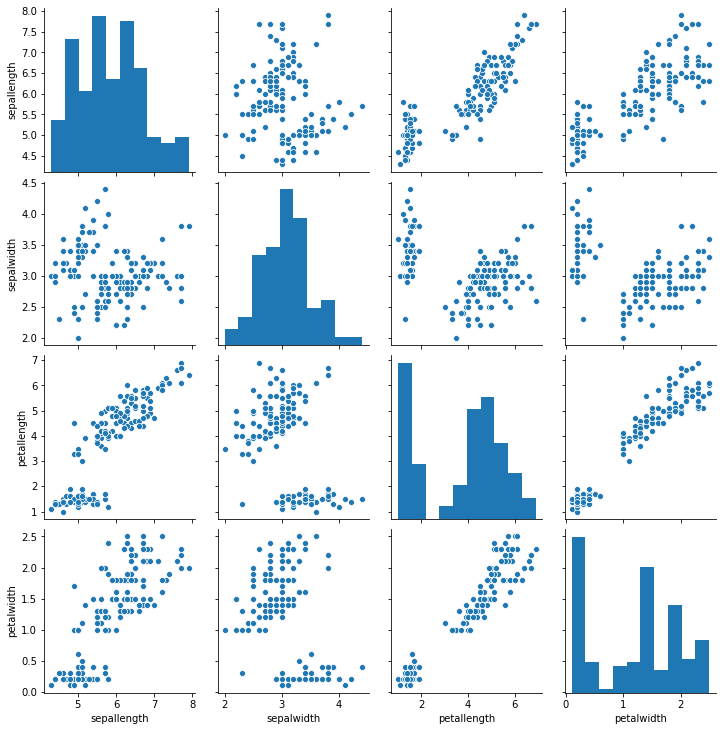

In [22]:
sns.pairplot(iris)

## Train and test split

In [23]:
# Prepare data for building the model
X=iris[["sepallength","sepalwidth","petallength"]]
y=iris[["petalwidth"]]

In [24]:
# Split dataset into train and test
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

## Model Building

In [25]:
from sklearn.linear_model import LinearRegression
multipleRegression=LinearRegression()

multipleRegression.fit(X_train,y_train)

LinearRegression()

In [26]:
# Obtain model parameters 

intercept=multipleRegression.intercept_[0]

slopes=multipleRegression.coef_

print("Intercept" +"\n", intercept,"\n", "Slopes" +"\n", slopes)

Intercept
 -0.14638058822498468 
 Slopes
 [[-0.26687211  0.27476292  0.54975508]]


## Make prediction based on trained model

In [28]:
y_pred=multipleRegression.predict(X_test)
# Formulate the dataframe between y_pred and y_test
df_pred=pd.DataFrame({"Predicted":pd.DataFrame(y_pred.tolist())[0].values, "Actual": pd.DataFrame(y_test.values.tolist())[0].values})

df_pred.head()

,Predicted,Actual
0,1.553032,1.5
1,1.886831,2.1
2,1.993603,2.2
3,1.437420,1.3
4,0.222344,0.1


In [29]:
# Way 2 to create a dataframe 
df_pred=pd.DataFrame({"Predicted":[i[0] for i in y_pred.tolist()], "Actual": [i[0] for i in y_test.values.tolist()]})

df_pred.head()

,Predicted,Actual
0,1.553032,1.5
1,1.886831,2.1
2,1.993603,2.2
3,1.437420,1.3
4,0.222344,0.1


## Model Accuracy 

In [30]:
# Check R^2 for train and test data (variance score)
R_train=multipleRegression.score(X_train,y_train)

R_test=multipleRegression.score(X_test,y_test)

print("R^2 for training data" + "\n", R_train, "\n", "R^2 for test data" +"\n", R_test)

R^2 for training data
 0.9371489777604495 
 R^2 for test data
 0.9367108277906381


In [31]:
# Check MSE and AME
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE=mean_squared_error(y_test, y_pred)
MAE=mean_absolute_error(y_test,y_pred)

print("MSE is {:.3} and MAE is {:0.3}".format(MSE,MAE))

MSE is 0.0439 and MAE is 0.166


## Output visualization check

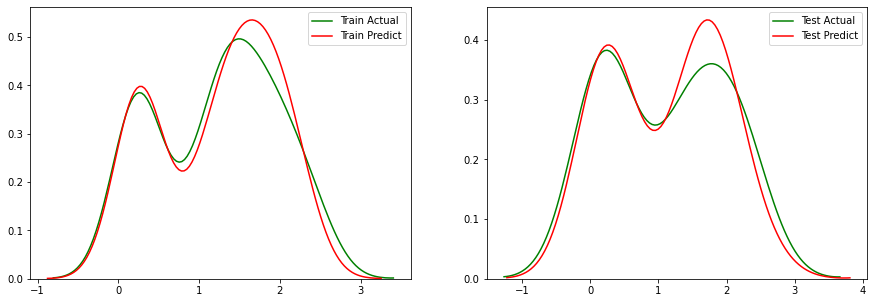

In [31]:
# make prediction on X_train data
y_train_pred=multipleRegression.predict(X_train)
# make prediction on X_test data
y_test_pred=multipleRegression.predict(X_test)

# using distribution plot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax1=sns.distplot(y_train, hist=False, color="g", label="Train Actual")
sns.distplot(y_train_pred, hist=False,color="r", label="Train Predict", ax=ax1)
plt.subplot(1,2,2)
ax2=sns.distplot(y_test, hist=False, color="g", label="Test Actual")
sns.distplot(y_test_pred, hist=False,color="r", label="Test Predict",ax=ax2)
plt.show()

## Feature Selection for Multiple Regression

#### Solution 1: Using SelectKBest 

In [32]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

In [33]:
bestFeatures=SelectKBest(score_func=f_regression, k="all")
fitModel=bestFeatures.fit(X,y)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [34]:
print(fitModel.scores_)

[ 299.1949571    21.55437779 1876.65781288]


In [35]:
# make a dataframe 
importantFeature=pd.DataFrame({"Feature":X.columns.tolist(),"Score":fitModel.scores_})
importantFeature

,Feature,Score
0,sepallength,299.194957
1,sepalwidth,21.554378
2,petallength,1876.657813


##### Solution 2: Using ExtraTreesRegressor

In [36]:
from sklearn.ensemble import ExtraTreesRegressor

In [37]:
bestFeature=ExtraTreesRegressor()

fitModel=bestFeature.fit(X,y)

print(fitModel.feature_importances_)

[0.17929556 0.04009506 0.78060938]


<ipython-input-37-638dcc338f5e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fitModel=bestFeature.fit(X,y)


<AxesSubplot:>

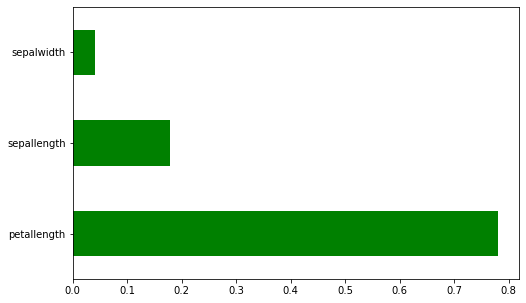

In [38]:
feat_importances = pd.Series(fitModel.feature_importances_, index=X.columns)
plt.figure(figsize=(8,5))
feat_importances.nlargest(3).plot(kind='barh', color="g")

#### Solution 3: Correlation matrix

In [39]:
data_sub = iris.iloc[:,0:4]
corrmat = data_sub.corr()
top_corr_features = corrmat.index

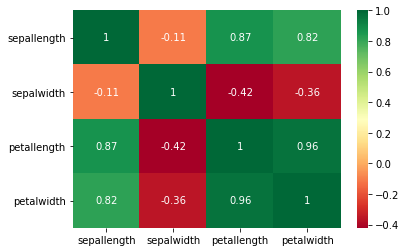

In [40]:
sns.heatmap(data_sub[top_corr_features].corr(),cmap="RdYlGn", annot=True)
plt.show()

- *Comments: sepallength and petallength can be the most suitable for predicting petalwidth.*